In [1]:
#用于数据处理和分析的工具包
import pandas as pd
#引入用于数据预处理/特征工程的工具包
from sklearn import preprocessing
#import决策树建模包
from sklearn import tree
from sklearn import model_selection

In [2]:
adult_data = pd.read_csv('../data/DecisionTree.csv')
adult_data.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [3]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital-status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   gender          32561 non-null  object
 7   native-country  32561 non-null  object
 8   income          32561 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


In [4]:
adult_data.shape

(32561, 9)

In [5]:
feature_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
label_column = ['income']

In [6]:
#区分特征和目标列
features = adult_data[feature_columns]
label = adult_data[label_column]

In [7]:
features.head(2)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [8]:
label.head(2)

,income
0,<=50K
1,<=50K


In [9]:
features = pd.get_dummies(features)
features.head(2)

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
#把数据切分成训练集和测试集

from sklearn import model_selection
features_train,features_test,label_train,label_test=model_selection.train_test_split(features,label,test_size=0.2)
print(features_train.shape)
print(features_test.shape)
print(label_train.shape)
print(label_test.shape)

(26048, 102)
(6513, 102)
(26048, 1)
(6513, 1)


In [11]:
#初始化一个决策树分类器
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=5)

#用决策树分类器拟合数据
clf = clf.fit(features_train.values, label_train.values)

In [12]:
from sklearn.metrics import recall_score
#模型在训练集的准确率
print(clf.score(features_train,label_train))
#模型在训练集的召回率
print(recall_score(label_train,clf.predict(features_train),average='macro'))

0.8265509828009828
0.7154197296102878


In [13]:
#模型在测试集的准确率
print(clf.score(features_test,label_test))
#模型在测试集的召回率
print(recall_score(label_test,clf.predict(features_test),average='macro'))

0.8116075541225242
0.704465308850813


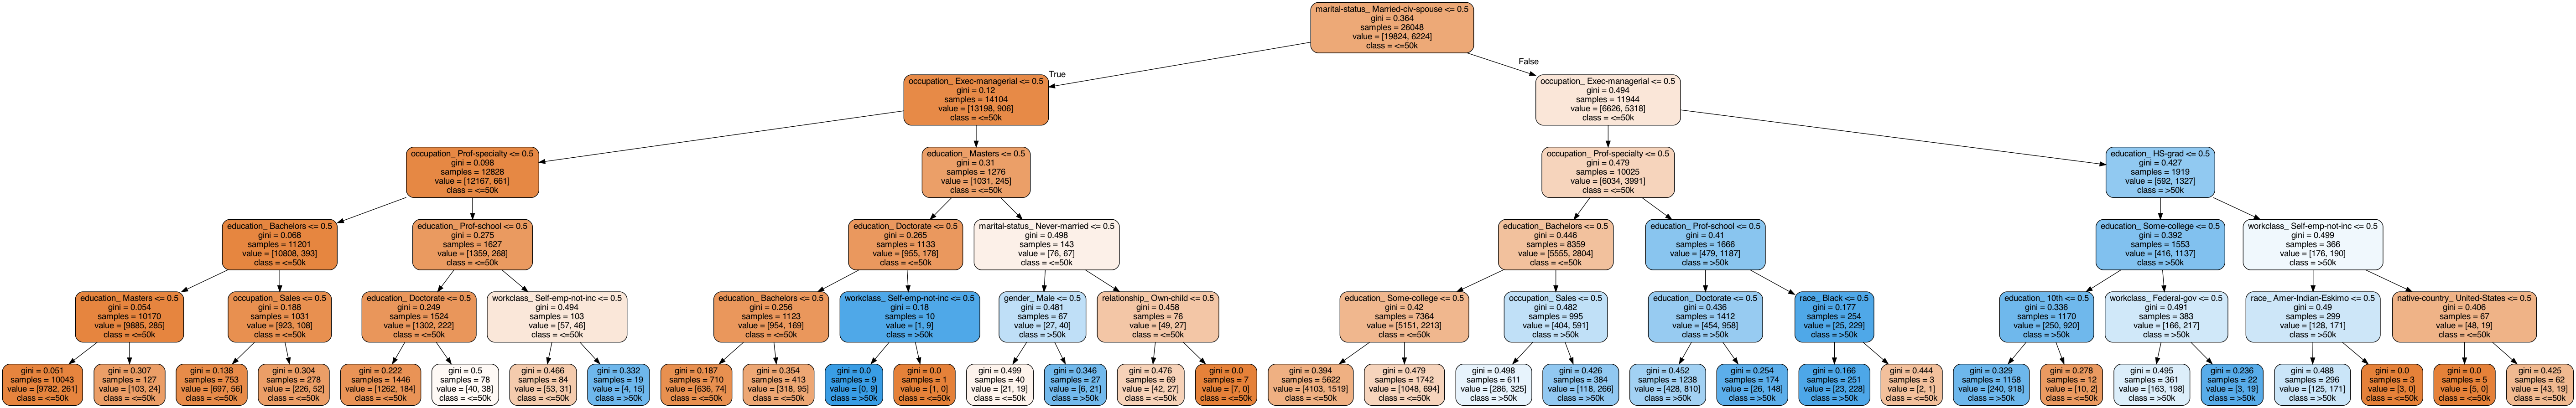

In [14]:
#可视化一下这颗决策树
import pydotplus
from IPython.display import display, Image

dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=features.columns,
                                class_names = ['<=50k', '>50k'],
                                filled = True,
                                rounded =True
                               )


graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))